### import dataset

In [2]:
import pandas as pd
file_path = "../data/titanic/train.csv"
data = pd.read_csv(file_path)

### explore dataset

In [2]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [2]:
data["Age"].value_counts().sort_index()

Age
0.42     1
0.67     1
0.75     2
0.83     2
0.92     1
        ..
70.00    2
70.50    1
71.00    2
74.00    1
80.00    1
Name: count, Length: 88, dtype: int64

In [55]:
survived = data['Survived'].mean()
not_survived = 1- survived

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt


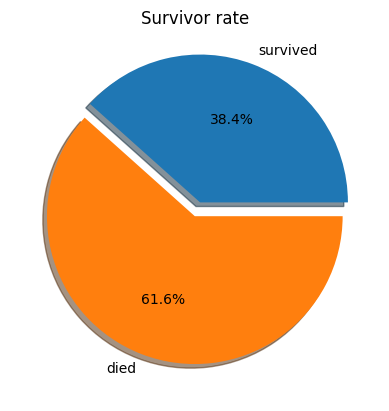

In [64]:
my_explode = (0.1, 0)
plt.pie([survived, not_survived], labels=["survived", "died"], autopct='%1.1f%%', explode=my_explode, shadow=True, startangle=0)
plt.title("Survivor rate")
plt.savefig("../report/figures/survivor_rate.png")


In [66]:
data["Sex"].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

Text(0.5, 1.0, 'Male and Female Distribution')

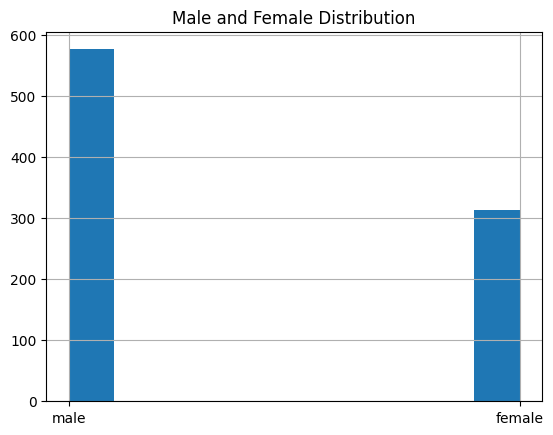

In [39]:
data['Sex'].hist()
plt.title("Male and Female Distribution")

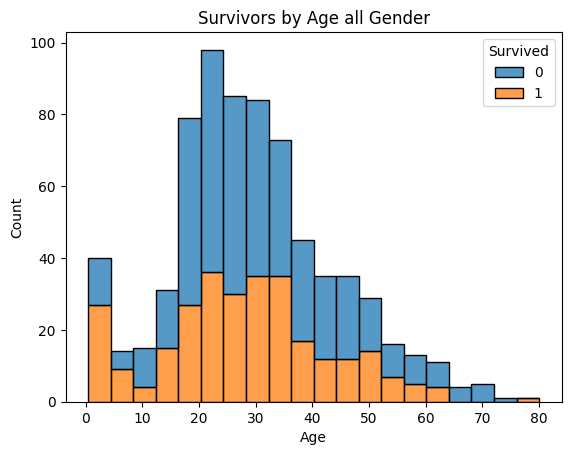

In [48]:
sns.histplot(data=data, x="Age", hue="Survived", bins=20, multiple="stack")
plt.title("Survivors by Age all Gender")
plt.savefig("../report/figures/survivors_by_age.png")

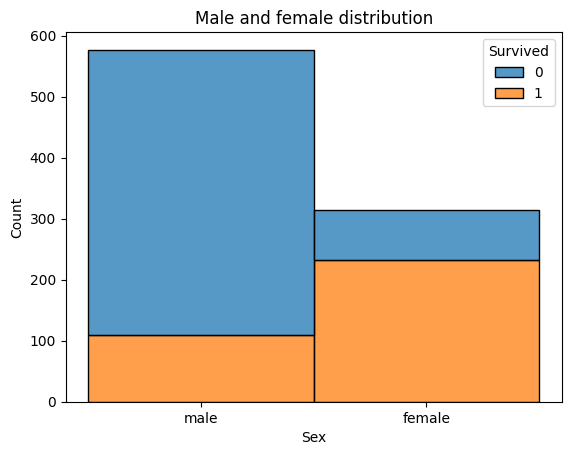

In [49]:
sns.histplot(data=data, x="Sex", hue="Survived", multiple="stack")
plt.title("Male and female distribution")
plt.savefig("../report/figures/male-female-distribution.png")

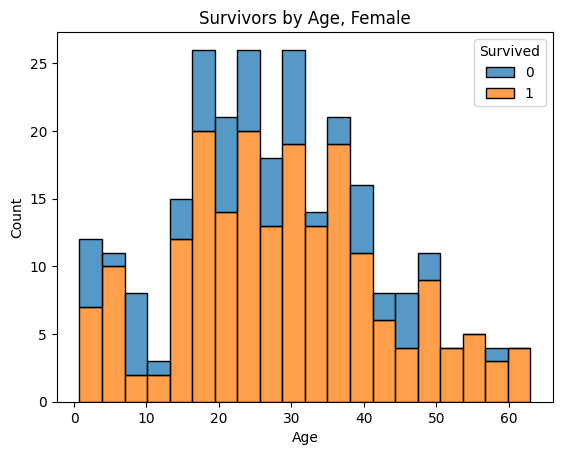

In [50]:
import matplotlib.pyplot as plt
sns.histplot(data=data[data["Sex"] == "female"], x="Age", hue="Survived", bins=20, multiple="stack")
plt.title("Survivors by Age, Female")
plt.savefig("../report/figures/survivors_by_age_female.png")

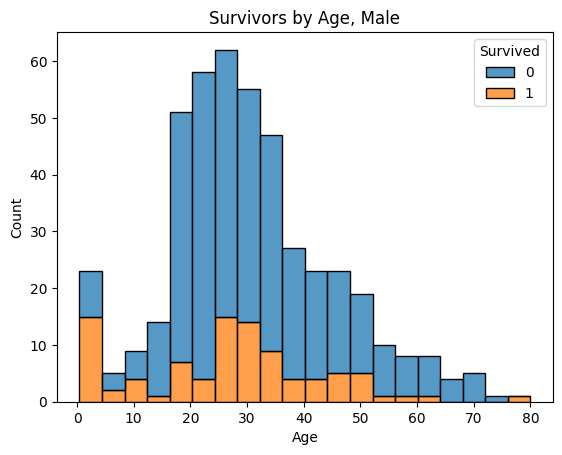

In [51]:
import matplotlib.pyplot as plt
sns.histplot(data=data[data["Sex"] == "male"], x="Age", hue="Survived", bins=20, multiple="stack")
plt.title("Survivors by Age, Male")
plt.savefig("../report/figures/survivors_by_age_male.png")

<Axes: >

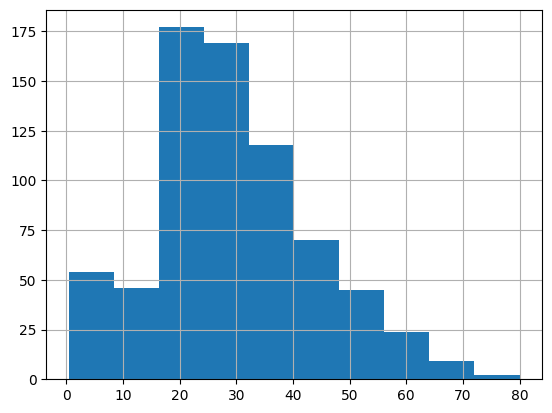

In [7]:
data['Age'].hist()

<Axes: xlabel='Fare', ylabel='Count'>

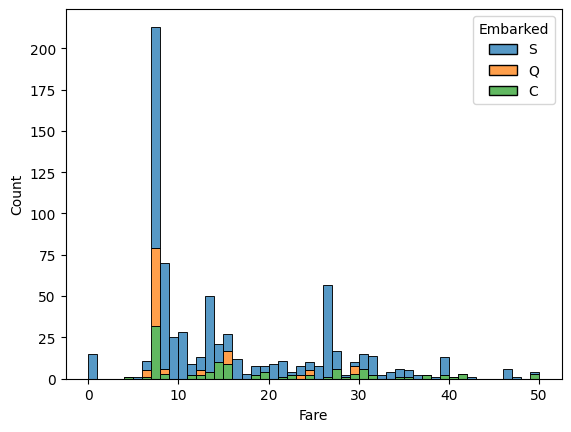

In [ ]:
# sns.histplot(data=data[data["Fare"] <= 50], x="Fare", hue="Embarked", multiple="stack", bins= 50)

# Feature Engineering

In [3]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [ ]:
data_feature_engineered = data

In [4]:
data_feature_engineered = pd.concat([data, pd.get_dummies(data["Embarked"])], axis=1)
data_feature_engineered.drop(columns="Embarked", inplace=True)

In [5]:
data_feature_engineered

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,False,False,True
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,False,False,True
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,False,False,True
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,False,False,True
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,True,False,False


In [6]:
data_feature_engineered = pd.concat([data_feature_engineered, pd.get_dummies(data_feature_engineered["Sex"])], axis=1)
data_feature_engineered.drop(columns="Sex", inplace=True)

In [7]:
data_feature_engineered

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,C,Q,S,female,male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,False,False,True,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,True,False,False,True,False
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,False,False,True,True,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,False,False,True,True,False
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,NaN,False,False,True,False,True
887,888,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,B42,False,False,True,True,False
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",NaN,1,2,W./C. 6607,23.4500,NaN,False,False,True,True,False
889,890,1,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,C148,True,False,False,False,True


In [8]:
data_feature_engineered.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
C                 bool
Q                 bool
S                 bool
female            bool
male              bool
dtype: object

In [101]:
data_feature_engineered["Survived"].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [9]:
data_feature_engineered["Age"].isna().sum()

177

In [10]:
data_feature_engineered["Age"].value_counts().sum()

714

In [11]:
data_feature_engineered["Age"].isna().sum() + data_feature_engineered["Age"].value_counts().sum()

891

In [12]:
import numpy as np

In [128]:
data_feature_engineered[data_feature_engineered["Age"] == np.nan]

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,C,Q,S,female,male


In [13]:
data_feature_engineered.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
C                0
Q                0
S                0
female           0
male             0
dtype: int64

In [8]:
data["Age"].boxp()

AttributeError: 'Series' object has no attribute 'boxp'

{'whiskers': [<matplotlib.lines.Line2D at 0x1fc401a5bb0>,
 'caps': [<matplotlib.lines.Line2D at 0x1fc426302c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1fc424bab40>],
 'medians': [<matplotlib.lines.Line2D at 0x1fc42633d10>],
 'fliers': [<matplotlib.lines.Line2D at 0x1fc42633ef0>],
 'means': []}

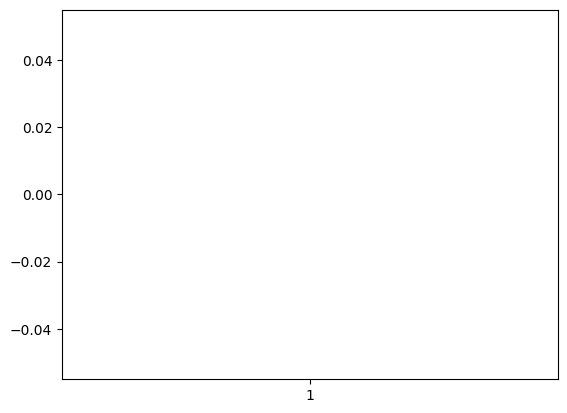

In [134]:
plt.boxplot(data["Age"])

<Axes: xlabel='Age'>

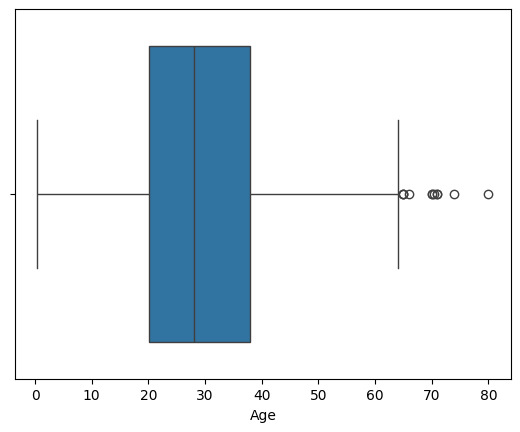

In [11]:
sns.boxplot(data=data_feature_engineered, x="Age")

<Axes: xlabel='Age', ylabel='Count'>

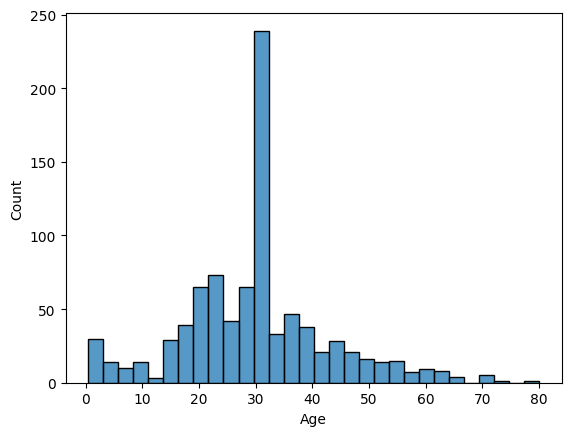

In [149]:
sns.histplot(data=data_feature_engineered, x="Age")

In [15]:
mean = data_feature_engineered['Age'].mean()

In [16]:
data_feature_engineered['Age'].replace(to_replace=np.nan, value= mean, inplace=True)

C:\Users\Jens\AppData\Local\Temp\ipykernel_22744\2311700540.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_feature_engineered['Age'].replace(to_replace=np.nan, value= mean, inplace=True)


In [140]:
np.nan

nan

In [17]:
data_feature_engineered.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
C                0
Q                0
S                0
female           0
male             0
dtype: int64

In [18]:
data_feature_engineered.drop(columns="Cabin", inplace=True)

In [19]:
data_feature_engineered

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,C,Q,S,female,male
0,1,0,3,"Braund, Mr. Owen Harris",22.000000,1,0,A/5 21171,7.2500,False,False,True,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.000000,1,0,PC 17599,71.2833,True,False,False,True,False
2,3,1,3,"Heikkinen, Miss. Laina",26.000000,0,0,STON/O2. 3101282,7.9250,False,False,True,True,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.000000,1,0,113803,53.1000,False,False,True,True,False
4,5,0,3,"Allen, Mr. William Henry",35.000000,0,0,373450,8.0500,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.000000,0,0,211536,13.0000,False,False,True,False,True
887,888,1,1,"Graham, Miss. Margaret Edith",19.000000,0,0,112053,30.0000,False,False,True,True,False
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",29.699118,1,2,W./C. 6607,23.4500,False,False,True,True,False
889,890,1,1,"Behr, Mr. Karl Howell",26.000000,0,0,111369,30.0000,True,False,False,False,True


In [20]:
data_feature_engineered.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
C              0
Q              0
S              0
female         0
male           0
dtype: int64

In [21]:
data_feature_engineered.drop(columns="Name", inplace=True)

In [22]:
data_feature_engineered.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
C              0
Q              0
S              0
female         0
male           0
dtype: int64

In [23]:
data_feature_engineered.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
C                 bool
Q                 bool
S                 bool
female            bool
male              bool
dtype: object

In [24]:
data_feature_engineered.drop(columns="Ticket", inplace=True)

In [25]:
data_feature_engineered

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,Q,S,female,male
0,1,0,3,22.000000,1,0,7.2500,False,False,True,False,True
1,2,1,1,38.000000,1,0,71.2833,True,False,False,True,False
2,3,1,3,26.000000,0,0,7.9250,False,False,True,True,False
3,4,1,1,35.000000,1,0,53.1000,False,False,True,True,False
4,5,0,3,35.000000,0,0,8.0500,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.000000,0,0,13.0000,False,False,True,False,True
887,888,1,1,19.000000,0,0,30.0000,False,False,True,True,False
888,889,0,3,29.699118,1,2,23.4500,False,False,True,True,False
889,890,1,1,26.000000,0,0,30.0000,True,False,False,False,True


In [26]:
data_feature_engineered.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Age            float64
SibSp            int64
Parch            int64
Fare           float64
C                 bool
Q                 bool
S                 bool
female            bool
male              bool
dtype: object

In [33]:
list = ["C", "Q", "S", "female", "male"]
for i in list:
    data_feature_engineered[i] = data_feature_engineered[i].astype(int)

In [34]:
data_feature_engineered.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Age            float64
SibSp            int64
Parch            int64
Fare           float64
C                int32
Q                int32
S                int32
female           int32
male             int32
dtype: object

In [32]:
data_feature_engineered["C"].astype(int)

0      0
1      1
2      0
3      0
4      0
      ..
886    0
887    0
888    0
889    1
890    0
Name: C, Length: 891, dtype: int32

In [96]:
data_feature_engineered.drop(columns="PassengerId", inplace=True)

In [97]:
data_feature_engineered.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,C,Q,S,female,male
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.188552,0.086420,0.722783,0.352413,0.647587
std,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429,0.391372,0.281141,0.447876,0.477990,0.477990
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200,0.000000,0.000000,1.000000,0.000000,1.000000
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000


In [98]:
data_feature_engineered

,Survived,Pclass,Age,SibSp,Parch,Fare,C,Q,S,female,male
0,0,3,22.000000,1,0,7.2500,0,0,1,0,1
1,1,1,38.000000,1,0,71.2833,1,0,0,1,0
2,1,3,26.000000,0,0,7.9250,0,0,1,1,0
3,1,1,35.000000,1,0,53.1000,0,0,1,1,0
4,0,3,35.000000,0,0,8.0500,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000,0,0,1,0,1
887,1,1,19.000000,0,0,30.0000,0,0,1,1,0
888,0,3,29.699118,1,2,23.4500,0,0,1,1,0
889,1,1,26.000000,0,0,30.0000,1,0,0,0,1


# select features and target columns

In [99]:
features = data_feature_engineered.drop(columns = "Survived")

In [100]:
target = data_feature_engineered["Survived"]

# min max scalar

In [40]:
from sklearn.preprocessing import MinMaxScaler


In [101]:
features

,Pclass,Age,SibSp,Parch,Fare,C,Q,S,female,male
0,3,22.000000,1,0,7.2500,0,0,1,0,1
1,1,38.000000,1,0,71.2833,1,0,0,1,0
2,3,26.000000,0,0,7.9250,0,0,1,1,0
3,1,35.000000,1,0,53.1000,0,0,1,1,0
4,3,35.000000,0,0,8.0500,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
886,2,27.000000,0,0,13.0000,0,0,1,0,1
887,1,19.000000,0,0,30.0000,0,0,1,1,0
888,3,29.699118,1,2,23.4500,0,0,1,1,0
889,1,26.000000,0,0,30.0000,1,0,0,0,1


In [102]:
scaler = MinMaxScaler()
X = scaler.fit_transform(features)

In [51]:
type(X)

numpy.ndarray

In [103]:
y = target

# train_test_set

In [104]:
from sklearn.model_selection import StratifiedShuffleSplit

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state = 123)


In [179]:
print(f"Training dataset shape, X_train: {X_train.shape}, y_train: {y_train.shape}")

Training dataset shape, X_train: (712, 10), y_train: (712,)


In [106]:
print(f"Testing dataset shape, X_test: {X_test.shape}, y_test: {y_test.shape}")

Testing dataset shape, X_test: (179, 10), y_test: (179,)


# Create models

## LogisticRegression

In [132]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver='liblinear').fit(X_train, y_train)

In [133]:
y_pred = lr.predict(X_test)

In [134]:
results = compute_metrics(y_true=y_test, y_pred=y_pred,name="lr")

In [135]:
compute_metrics(y_true=y_test, y_pred=y_pred,name="lr")

,Accuracy,Precision,Recall,Specificity,F1-Score
lr,0.7989,0.7619,0.6957,0.8636,0.7273


In [178]:
lr.coef_

array([[-1.87783827, -1.94255486, -1.32330965, -0.34460651,  0.49346284,
         0.39732207,  0.45780509, -0.01659711,  1.85319004, -0.7345445 ]])

In [188]:
pd.DataFrame(columns=features.columns)

,Pclass,Age,SibSp,Parch,Fare,C,Q,S,female,male


TypeError: 'list' object is not callable

In [185]:
pd.concat([a,lr.coef_])

TypeError: cannot concatenate object of type '<class 'numpy.ndarray'>'; only Series and DataFrame objs are valid

## KNeighbors

In [136]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=10)
knn = knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [137]:
compute_metrics(y_true=y_test, y_pred=y_pred,name="kN10")

,Accuracy,Precision,Recall,Specificity,F1-Score
kN10,0.7877,0.7818,0.6232,0.8909,0.6935


In [138]:
results = pd.concat([results, compute_metrics(y_true=y_test, y_pred=y_pred,name="kN10")]) 

In [139]:
results

,Accuracy,Precision,Recall,Specificity,F1-Score
lr,0.7989,0.7619,0.6957,0.8636,0.7273
kN10,0.7877,0.7818,0.6232,0.8909,0.6935


In [112]:
import seaborn as sns

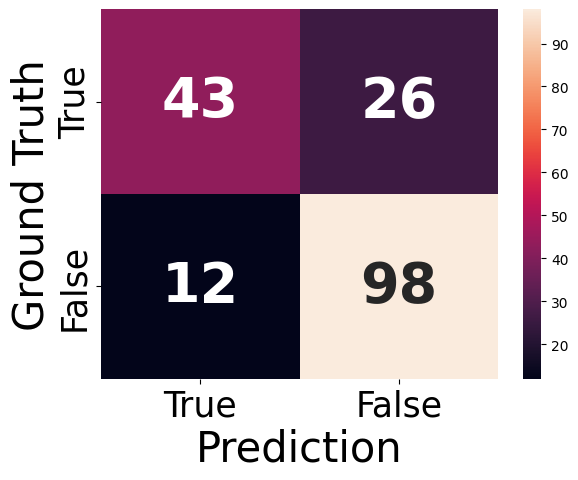

In [113]:
create_heatmap(y_test, y_pred)

In [154]:
max_k = 40
# knk = pd.DataFrame()
for k in range(1, max_k):
    
    knn = KNeighborsClassifier(n_neighbors=k)
    knn = knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    if k ==1:
        knk = compute_metrics(y_true=y_test, y_pred=y_pred,name="kN"+str(k))
    knk = pd.concat([knk,compute_metrics(y_true=y_test, y_pred=y_pred,name="kN"+str(k))],axis=0)

    

<Axes: >

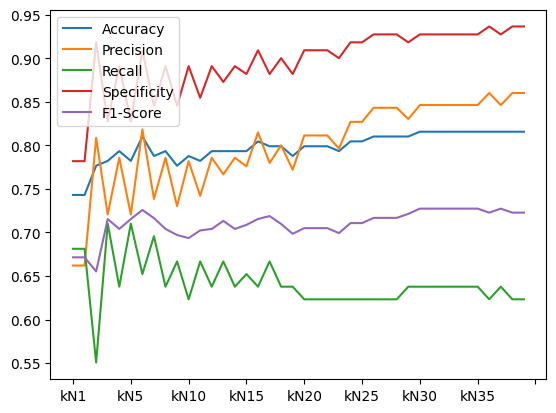

In [155]:
knk.plot()

## SVM 

In [83]:
from sklearn.svm import SVC

In [140]:
model = SVC()

In [141]:
model.fit(X_train, y_train)

SVC()

In [142]:
y_pred = model.predict(X_test)


In [143]:
compute_metrics(y_true=y_test, y_pred=y_pred,name="SVM")

,Accuracy,Precision,Recall,Specificity,F1-Score
SVM,0.8101,0.8571,0.6087,0.9364,0.7119


In [144]:
results = pd.concat([results, compute_metrics(y_true=y_test, y_pred=y_pred,name="SVM")]) 

In [145]:
results

,Accuracy,Precision,Recall,Specificity,F1-Score
lr,0.7989,0.7619,0.6957,0.8636,0.7273
kN10,0.7877,0.7818,0.6232,0.8909,0.6935
SVM,0.8101,0.8571,0.6087,0.9364,0.7119


## Decision Tree

In [157]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt = dt.fit(X_train, y_train)

In [158]:
y_pred = dt.predict(X_test)

In [161]:
compute_metrics(y_true=y_test, y_pred=y_pred,name="DTC")

,Accuracy,Precision,Recall,Specificity,F1-Score
DTC,0.7486,0.6714,0.6812,0.7909,0.6763


In [150]:
results = pd.concat([results, compute_metrics(y_true=y_test, y_pred=y_pred,name="DTC")]) 

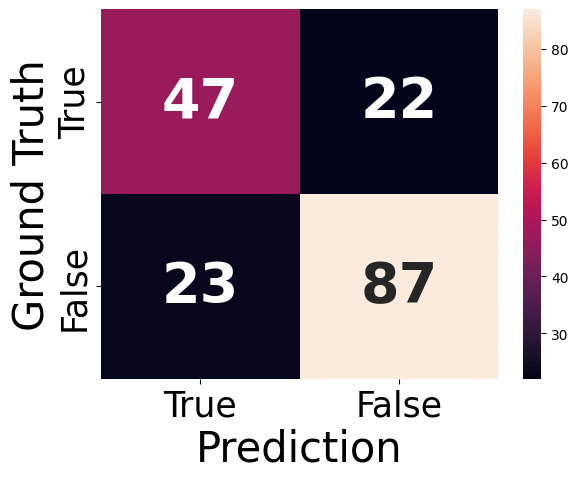

In [149]:
create_heatmap(y_test, y_pred)

In [94]:
y_pred == y_test

561     True
641     True
400    False
498    False
875     True
       ...  
339     True
841     True
442     True
815     True
53      True
Name: Survived, Length: 179, dtype: bool

In [160]:
dt.tree_.node_count, dt.tree_.max_depth

(313, 19)

In [163]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth':range(1, dt.tree_.max_depth+1, 2),
              'max_features': range(1, len(dt.feature_importances_)+1)}

GR = GridSearchCV(DecisionTreeClassifier(random_state=42),
                  param_grid=param_grid,
                  scoring='accuracy',
                  n_jobs=-1)

GR = GR.fit(X_train, y_train)

In [164]:
GR.best_estimator_.tree_.node_count, GR.best_estimator_.tree_.max_depth

(107, 7)

In [166]:
y_test_pred_gr = GR.predict(X_test)

In [167]:
dtc_02 = compute_metrics(y_test, y_test_pred_gr, "DTC_with_GRIDSEARCHCV")

In [168]:
dtc_02

,Accuracy,Precision,Recall,Specificity,F1-Score
DTC_with_GRIDSEARCHCV,0.8045,0.8036,0.6522,0.9,0.72


# Final Results

In [151]:
results

,Accuracy,Precision,Recall,Specificity,F1-Score
lr,0.7989,0.7619,0.6957,0.8636,0.7273
kN10,0.7877,0.7818,0.6232,0.8909,0.6935
SVM,0.8101,0.8571,0.6087,0.9364,0.7119
DTC,0.7486,0.6714,0.6812,0.7909,0.6763


In [171]:
results.round(2)

,Accuracy,Precision,Recall,Specificity,F1-Score
lr,0.80,0.76,0.70,0.86,0.73
kN10,0.79,0.78,0.62,0.89,0.69
SVM,0.81,0.86,0.61,0.94,0.71
DTC,0.75,0.67,0.68,0.79,0.68


In [176]:
results_print = results.round(3)

In [177]:
results_print.to_csv("../data/final_results.csv")

# Metric

In [63]:
from sklearn.metrics import confusion_matrix
import numpy as np
def compute_metrics(y_true, y_pred, name):
    # returns accuracy, precision, recall, specificity and f1-score as pandas dataframe
    tn, fp, fn, tp = confusion_matrix(y_true=y_true, y_pred=y_pred).ravel()
    accuracy = (tp+tn)/(tp+tn+fp+fn)
    precision = tp/(tp+fp)
    recall = tp/(tp+ fn)
    specificity = (tn/(fp+tn))
    f1_score = 2 * ((precision*recall)/(precision+recall))
    performance_metric = {"Accuracy": [round(accuracy, 4)],
                          "Precision": [round(precision,4)],
                          "Recall": [round(recall,4)], 
                          "Specificity": [round(specificity,4)],
                          "F1-Score": [round(f1_score,4)]
                         }
    df = pd.DataFrame(performance_metric, index=[name])
    return df

In [78]:
def create_heatmap(y_true, y_pred):
    # creates heatmap
    tn, fp, fn, tp = confusion_matrix(y_true=y_true, y_pred=y_pred).ravel()
    confusion_matrix_adjusted = np.array([[tp, fn],[fp, tn]])
    ax = sns.heatmap(confusion_matrix_adjusted, annot=True, fmt='d', annot_kws={"size": 40, "weight": "bold"})  
    labels = ['True', 'False']
    ax.set_xticklabels(labels, fontsize=25);
    ax.set_yticklabels(labels, fontsize=25);
    ax.set_ylabel('Ground Truth', fontsize=30);
    ax.set_xlabel('Prediction', fontsize=30)

|Ground Truth |Predicted as True | Predicted as False| 
| -------- | --------------| -------------|
|True|True Postive (TP)| False Negative (FN)|
|False|False Positve (FP)|True Negative (TN)|

|Metric    | Equation                  |
|----------|---------------------------|
|Accuracy: |$\frac{TP+TN}{TP+FN+FP+TN}$|
|Precision:|$\frac{TP}{TP+FP}$         |
|Recall or Sensitivity:| $\frac{TP}{TP+FN}$|
|Specificity:| $\frac{TN}{FP+TN}$|
|F1Score: |$2\cdot \frac{Precision \cdot Recall}{Precison + Recall} $|
